# Маркетинговое исследование по продажам видеоигр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и спланируем кампанию на 2017-й. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:** Выявить определяющие успешность игры закономерности, путем проверки гипотез:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Содержание**
    
    
1. [Изучение данных из файла](#open)
    
    
2. [Предобработка данных](#preproc)
     
    
3. [Исследовательский анализ данных](#pred)


4. [Портрет пользователей по регионам](#portr)


5. [Проверка гипотез](#research)
    * [5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#ans1)
    * [5.2 Средние пользовательские рейтинги жанров Action и Sports разные](#ans2)
    
    
6. [Общий вывод](#summary)

<a id="open"></a>
## 1. Изучение данных из файла

**Описание данных:**

*	Name — название игры
*	Platform — платформа
*	Year_of_Release — год выпуска
*	Genre — жанр игры
*	NA_sales — продажи в Северной Америке (миллионы проданных копий)
*	EU_sales — продажи в Европе (миллионы проданных копий)
*	JP_sales — продажи в Японии (миллионы проданных копий)
*	Other_sales — продажи в других странах (миллионы проданных копий)
*	Critic_Score — оценка критиков (максимум 100)
*	User_Score — оценка пользователей (максимум 10)
*	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


In [1]:
# Импортируем библиотеки

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# Изучаем таблицу

# data = pd.read_csv('games.csv', sep = ',' )
data = pd.read_csv('/datasets/games.csv', sep = ',' )
display(data.head(10))
data.tail(10)
data.sample(5)
data.info()
data['User_Score'].unique()
data['Critic_Score'].unique()
data['Name'].unique()
data['Platform'].unique()
data.describe().T


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,"16,446.00","2,006.48",5.88,"1,980.00","2,003.00","2,007.00","2,010.00","2,016.00"
NA_sales,"16,715.00",0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,"16,715.00",0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,"16,715.00",0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,"16,715.00",0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,"8,137.00",68.97,13.94,13.00,60.00,71.00,79.00,98.00


### Вывод

Данные открыты и изучены. Названия колонок следует привести к нижнему регистру. 

Найдены редкие пропуски в полях: 
* Name
* Genre

А также множественные пропуски в полях: 
* Year_of_Release
* Critic_Score
* User_Score
* Rating

Пропуски могли возникнуть по техническим причинам или из-за человеческого фактора.

Некоректные типы данных:

* Year_of_Release следует привести к типу int16
* NA_sales снизим битность поля
* EU_sales снизим битность поля
* JP_sales снизим битность поля
* Other_sales снизим битность поля
* Critic_Score следует привести к типу int8
* User_Score следует привести к типу float


<a id="preproc"></a>
## 2. Предобработка данных

Переименуем поля

In [3]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обработаем пропуски в годе выпуска, заполнив аналогичными значениями по названию игры. Пропуски в других полях пока оставим, так как они не зависят от других известных нам характеристик.

In [4]:
#сгруппируем данные по играм и году издания
god_game = data.groupby('name')['year_of_release'].max().reset_index()
god_game = god_game.rename(columns = {'year_of_release':'year'})
data = data.merge(god_game, how='left', on='name')

#Воспользуемся логической индексацией:
data.loc[data['year_of_release'].isna(), 'year_of_release'] = data['year']

In [5]:
#Удалим лишние добавленные нами колонки
try:
    data = data.drop(["year_x"], axis=1)
    data = data.drop(["year_y"], axis=1)
    data = data.drop(["year"], axis=1)
except:
     print('Поля удалены')

Поля удалены


Обработаем аббревиатуру tbd в столбцах с рейтингом. Аббревиатура переводится, как "to be determined, to be done", это означает что данные пропущены специально. Заменим их на NaN.

In [6]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
# data['user_score'].unique()

Изменим типы данных в соответствии с нашими решениями.

In [7]:

data = data.astype({"na_sales": "float32", "eu_sales": "float32", "jp_sales": "float32", "other_sales": "float32", "user_score": "float32", "critic_score": "float32"})
data['year_of_release'] = data['year_of_release'].astype('Int16')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
 11  year             16567 non-null  float64
dtypes: Int16(1), float32(6), float64(1), object(4)
memory usage: 1.7+ MB


Типы данных успешно изменены, использование памяти сокращено на 15%

Посчитаем суммарные продажи во всех регионах

In [8]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,"2,006.00",82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,"1,999.00",40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,"2,008.00",35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,"2,009.00",32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,"1,996.00",31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,"1,989.00",30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,"2,006.00",29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,"2,006.00",28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.40,E,"2,009.00",28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,"1,984.00",28.31


### Вывод

Предобработка проведена: 
* типы данных изменены на более корректные;
* колонки переименованы в нижний регистр;
* пропуски обработаны в полях, где это целесообразно;
* проведен расчет суммарных продаж необходимый для дальнейшего исследования.

<a id="pred"></a>
## 3. Исследовательский анализ данных

Выясним, сколько игр выпускалось в разные годы и важны ли данные за все периоды.


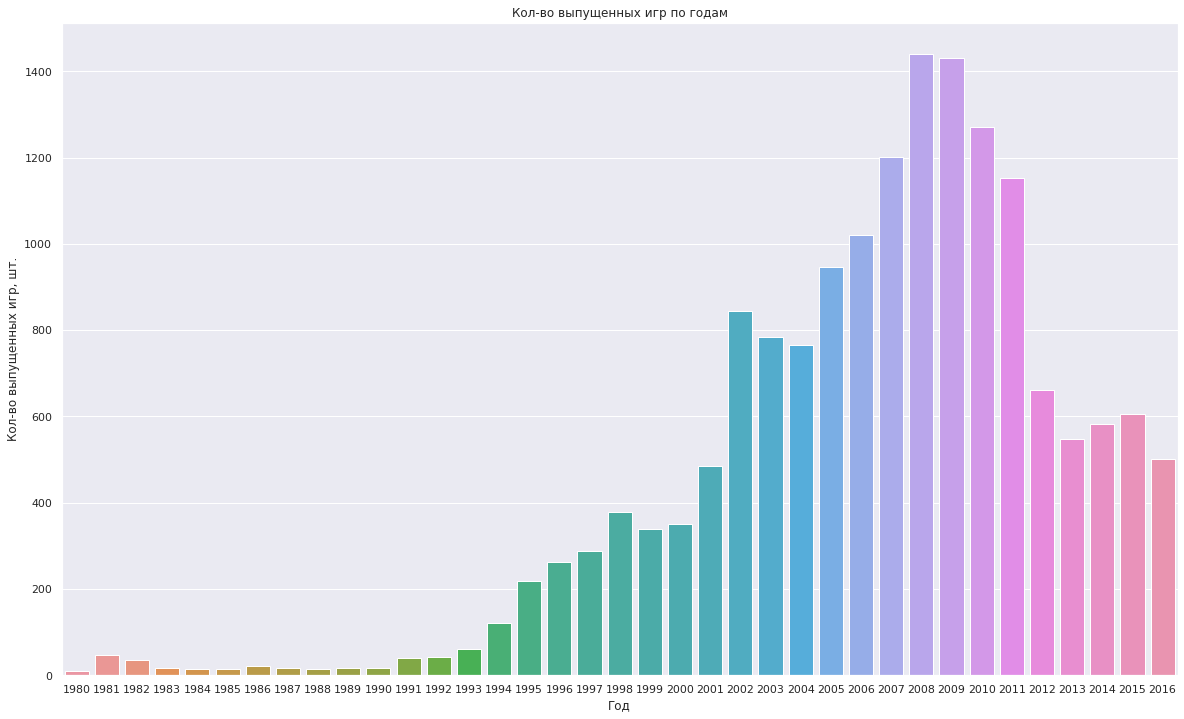

In [34]:
# Сгруппируем таблицу по году выпуска, чтобы просмотреть как менялось количество игр
games_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
games_years.columns = ['year_of_release', 'cnt_games']
# display(games_years.sort_values('year_of_release'))

bar = sb.barplot(y='cnt_games',x='year_of_release',  data=games_years.sort_values('year_of_release'))
sb.set(rc = {'figure.figsize':(20,12)})
bar.set(xlabel='Год', ylabel='Кол-во выпущенных игр, шт.', title='Кол-во выпущенных игр по годам')
plt.show()

По графику можно увидеть, что количество игр резко возросло после с 1991го года. Пик приходится на 2007 год.
С 2008 года производство игр пошло на спад. Вероятно, геймдив ушел в мобильную разработку из-за роста популярности смартфонов, а мобильные платформы в данных не представлены.

Выясним, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим период 4 года. Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы. 


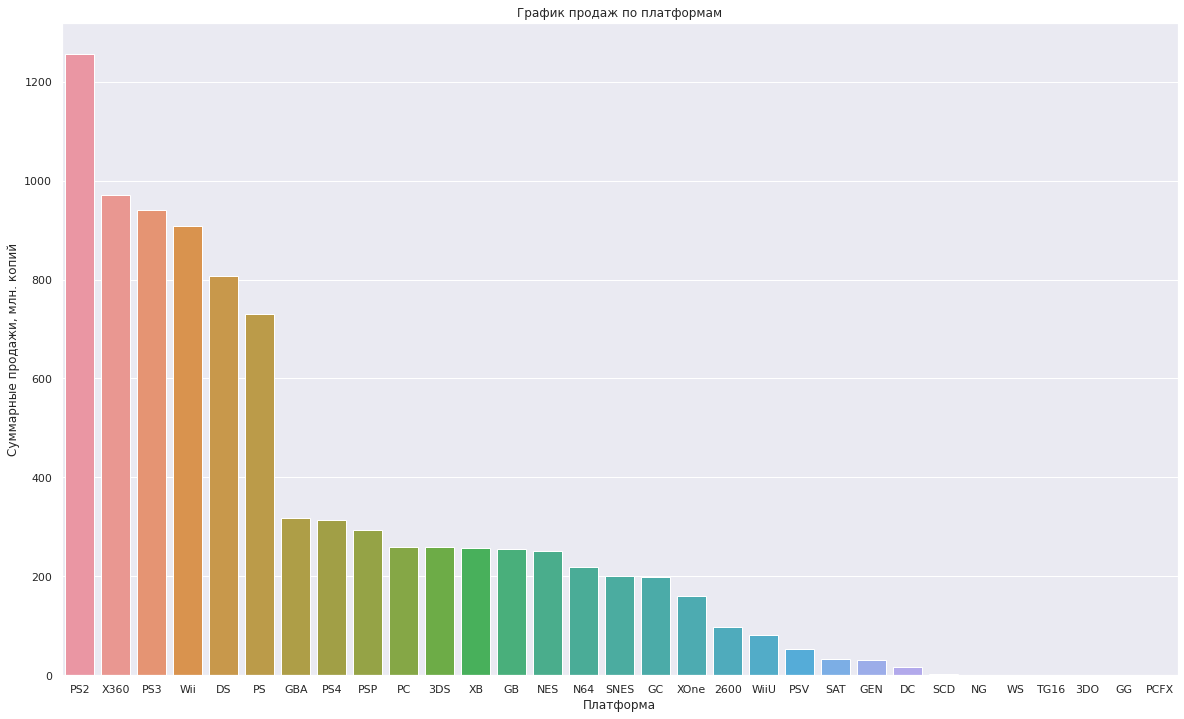

In [10]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
# platform_sales

bar = sb.barplot(y='total_sales',x='platform',  data=platform_sales)
sb.set(rc = {'figure.figsize':(11,8)})
bar.set(xlabel='Платформа', ylabel='Суммарные продажи, млн. копий', title='График продаж по платформам')
plt.show()

Самые популярные игровые платформы за все годы: PS2, X360, PS3, WII, DS, PS.

In [11]:
# Отберем самые популярные платформы за последние 4 года
top_platforms = data.query('year_of_release>=2013').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_platforms =top_platforms.reset_index()
display(top_platforms)

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63


In [12]:
# Добавим функцию, которая будет возвращать сгруппированные по продажам данные с 2013 года
def sale_platform_for_years(platf):
    prepare = data[(data['platform'] == platf) & (data['year_of_release'] >= 2013) & (data['total_sales'].isna()==False)]
    res = prepare.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return res

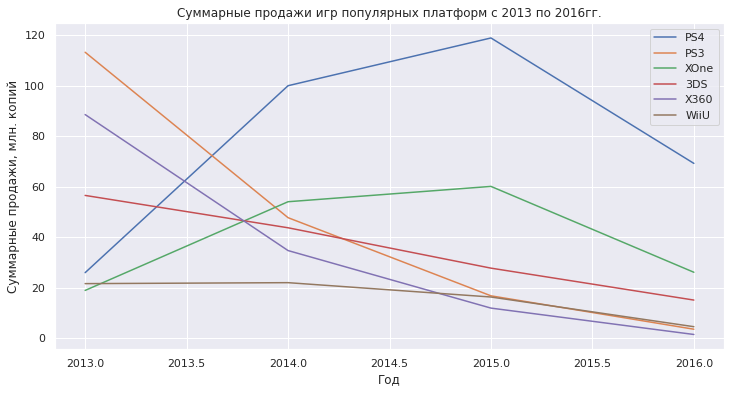

In [13]:
# Построим распределение популярных платформ по годам, начиная с 2013-го

plt.figure(figsize=(12,6))
plt.title('Суммарные продажи игр популярных платформ с 2013 по 2016гг.')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн. копий')

for p in list(top_platforms['platform']):
      try:
#       print(sale_platform_for_years(p)['total_sales'],p)
        sb.lineplot(data=sale_platform_for_years(p)['total_sales'], label=p)
        plt.legend()
      except:
        ''

Посчитаем разницу в годах между последней продажей и первой для каждой платформы и посчитаем среднее.

In [14]:
maxyear_plat = data.groupby('platform')['year_of_release'].max().reset_index() 
minyear_plat = data.groupby('platform')['year_of_release'].min().reset_index()
merge_plat = maxyear_plat.merge(minyear_plat,on='platform')
merge_plat['diff_years'] = merge_plat['year_of_release_x'] - merge_plat['year_of_release_y']
merge_plat['diff_years'].mean()

8.161290322580646

Среднее время жизни платформ составляет 8 лет.

За рассматриваемый период наилучшие продажи были у PS4, XOne и 3DS, примем их за потенциально самые прибыльные, так как срок их жизни еще не подошел к концу. Добавим в список также PC, платформу пережившую многие другие, которая актуальна до сих пор несмотря на более низкие продажи, чем у консолей.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по выбранным популярным платформам.

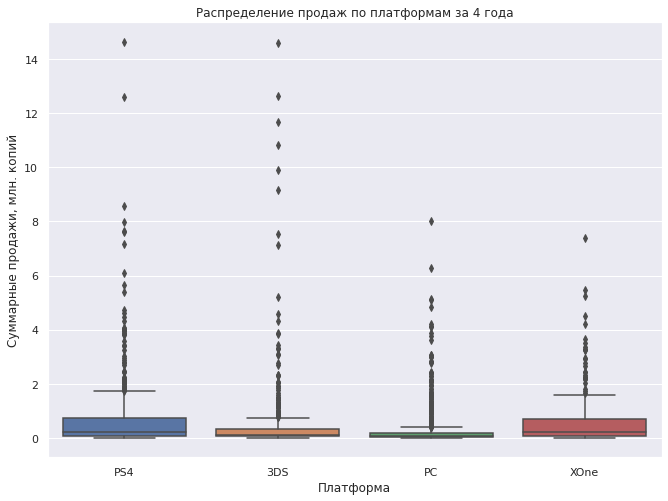

In [15]:
top = data[data['platform'].isin(['PS4','XOne','3DS','PC'])]

bar = sb.boxplot(data=top, x='platform', y='total_sales')
sb.set(rc = {'figure.figsize':(15,5)})
bar.set(xlabel='Платформа', ylabel='Суммарные продажи, млн. копий', title='Распределение продаж по платформам за 4 года')
plt.show()

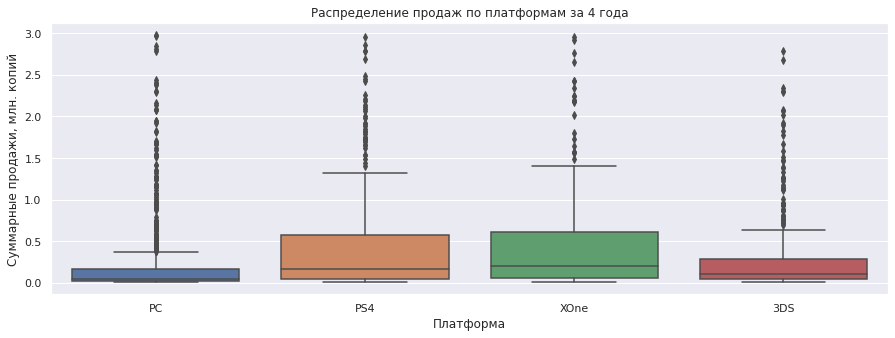

In [16]:
# Отбросим более редкие значения
top = top[top['total_sales']<3]

bar = sb.boxplot(data=top, x='platform', y='total_sales')
sb.set(rc = {'figure.figsize':(15,5)})
bar.set(xlabel='Платформа', ylabel='Суммарные продажи, млн. копий', title='Распределение продаж по платформам за 4 года')
plt.show()

По второму графику видно, что медианы продаж выше всего у игр на PS4 и XOne.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [17]:
#Корреляция между оценками пользователей и общими продажами 
ps = data[data['platform']=='PS4']
ps['user_score'].corr(ps['total_sales'])

-0.031957105603966966

In [18]:
#Корреляция между оценкой критиков и общими продажам
ps['critic_score'].corr(ps['total_sales'])

0.40656790102834933

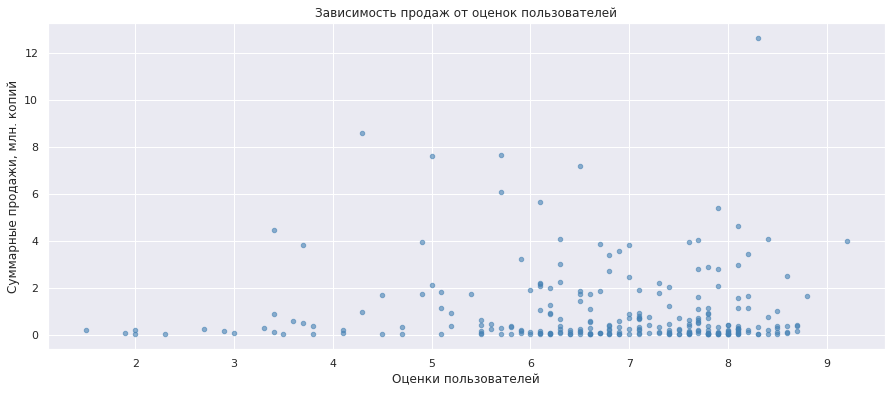

In [19]:
#Построим диаграмму рассеяния по оценкам пользователей и продажам
scat = ps.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', figsize=(15, 6), color='steelblue', alpha=0.6) 
scat.set(xlabel='Оценки пользователей', ylabel='Суммарные продажи, млн. копий', title='Зависимость продаж от оценок пользователей') 
plt.show()

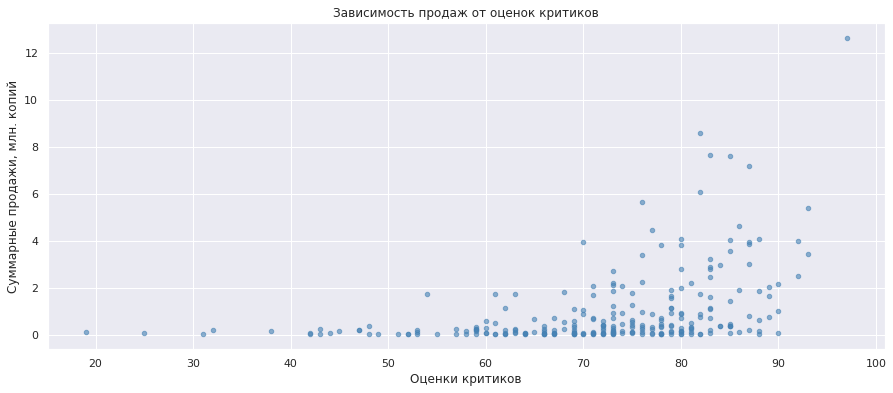

In [20]:
#Построим диаграмму рассеяния по оценкам критиков и продажам
scat = ps.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', figsize=(15, 6), color='steelblue', alpha=0.6) 
scat.set(xlabel='Оценки критиков', ylabel='Суммарные продажи, млн. копий', title='Зависимость продаж от оценок критиков') 
plt.show()

По диаграммам рассеяния видно, что оценки критиков гораздо сильнее коррелируют с продажами, чем оценки пользователей. Коэфициент Пирсона больше на 0.4

Соотнесем выводы с продажами игр на других платформах.

In [21]:
#Напишем функцию для построения диаграмм рассеивания и расчета коэффициента корреляции по оценкам и продажам в других платформах

def scatter_and_korr (name):
    platform = data[data['platform']==name]
    fig, ax = plt.subplots(1, 2, figsize=(12,5))
    sb.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sb.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name)
    ax[0].set(xlabel='Оценки пользователей')
    ax[1].set(xlabel='Оценки критиков')
    ax[0].set(ylabel='Суммарные продажи, млн. копий')
    ax[1].set(ylabel='Суммарные продажи, млн. копий')
    plt.show()    
    cor_users = platform['user_score'].corr(platform['total_sales'])
    cor_critics = platform['critic_score'].corr(platform['total_sales'])
    print('Коэфициент корреляции Пирсона между продажами и оценками\nПОЛЬЗОВАТЕЛЕЙ:', cor_users,'\nКРИТИКОВ:', cor_critics)

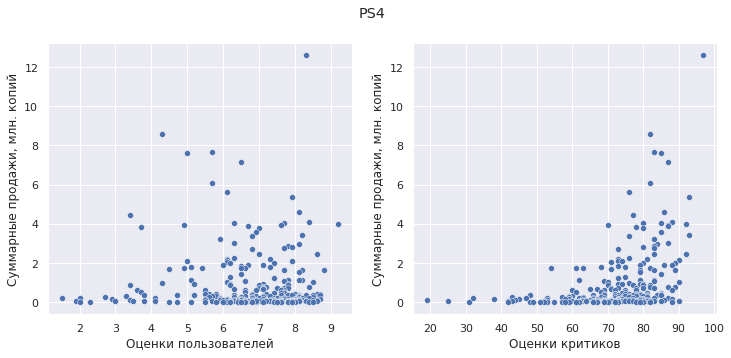

Коэфициент корреляции Пирсона между продажами и оценками
ПОЛЬЗОВАТЕЛЕЙ: -0.031957105603966966 
КРИТИКОВ: 0.40656790102834933


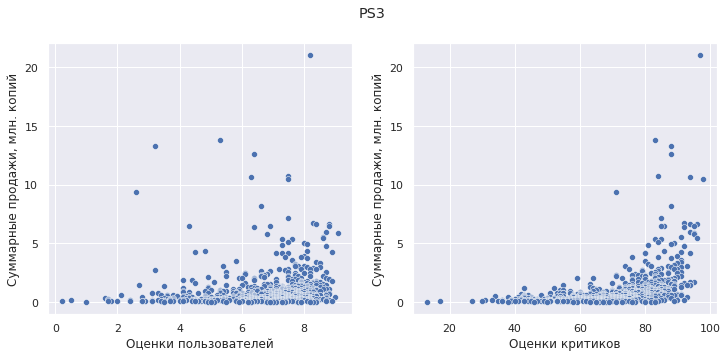

Коэфициент корреляции Пирсона между продажами и оценками
ПОЛЬЗОВАТЕЛЕЙ: 0.12669134879725075 
КРИТИКОВ: 0.43243157461161663


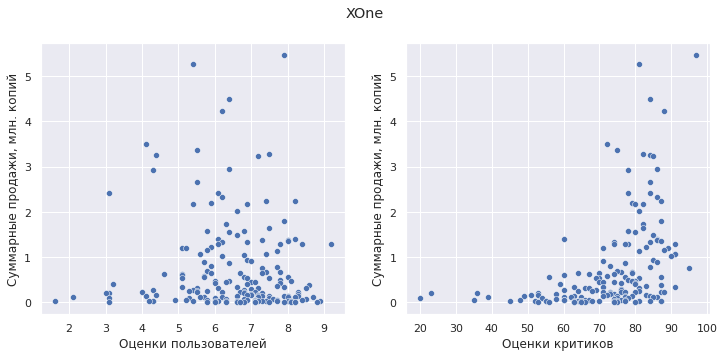

Коэфициент корреляции Пирсона между продажами и оценками
ПОЛЬЗОВАТЕЛЕЙ: -0.06892505829722281 
КРИТИКОВ: 0.41699832684400107


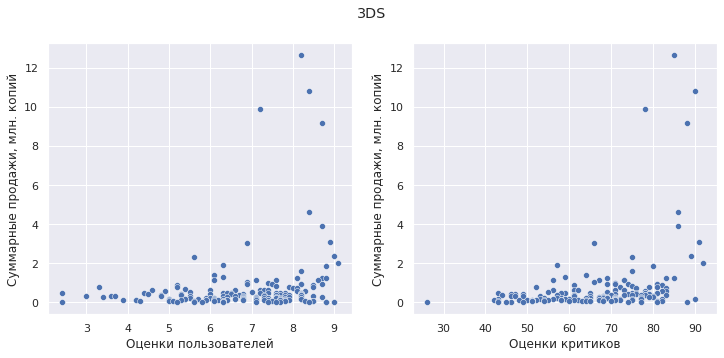

Коэфициент корреляции Пирсона между продажами и оценками
ПОЛЬЗОВАТЕЛЕЙ: 0.2248079511342652 
КРИТИКОВ: 0.3494009305453435


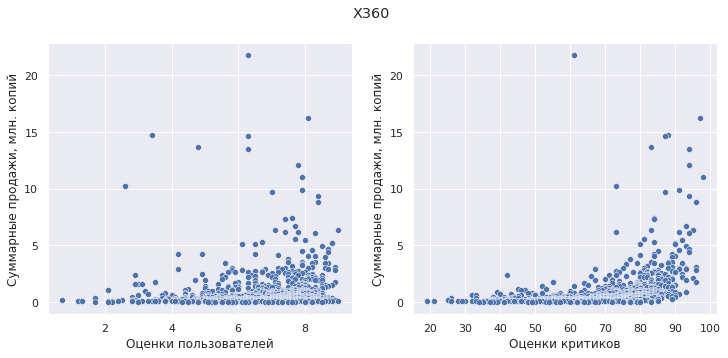

Коэфициент корреляции Пирсона между продажами и оценками
ПОЛЬЗОВАТЕЛЕЙ: 0.11445883570530249 
КРИТИКОВ: 0.39373586671840544


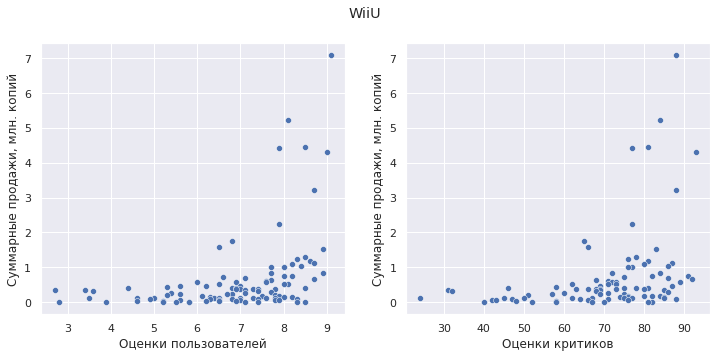

Коэфициент корреляции Пирсона между продажами и оценками
ПОЛЬЗОВАТЕЛЕЙ: 0.4002190371566136 
КРИТИКОВ: 0.3483797599500602


In [22]:
for platform in list(top_platforms['platform']): 
# ['XOne','3DS','PC']:
    scatter_and_korr(platform)

Выводы по избранной нами платформе PS4 совпадают с выводами по другим платформам: корреляция между продажами и оценками критиков заметно выше, чем аналогичная корреляция с оценками пользователей.

Посмотрим на общее распределение игр по жанрам: что можно сказать о самых прибыльных жанрах, выделяются ли жанры с высокими и низкими продажами.

,genre,total_sales
0,Strategy,174.23
1,Adventure,237.59
2,Puzzle,242.57
3,Simulation,389.97
4,Fighting,447.53
5,Racing,728.67
6,Misc,802.51
7,Platform,827.77
8,Role-Playing,934.56
9,Shooter,"1,052.45"


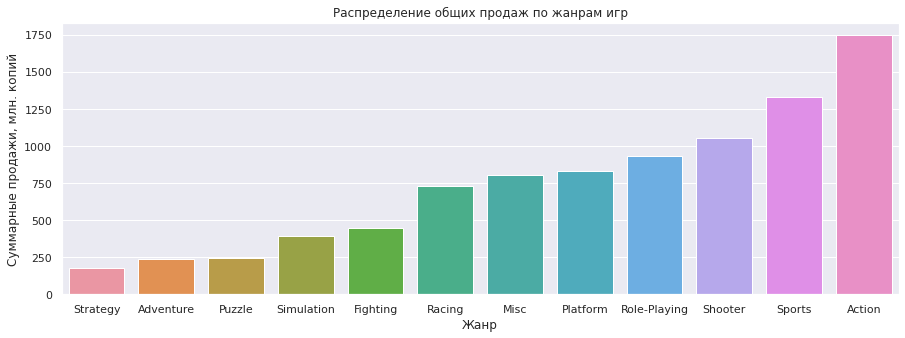

In [23]:
# Воспользуемся сводной таблицей
genre_sales = data.pivot_table(index='genre', values='total_sales',aggfunc='sum')
display(genre_sales.sort_values('total_sales').reset_index())

bar = sb.barplot(y='total_sales',x='genre', data=genre_sales.sort_values('total_sales').reset_index())
sb.set(rc = {'figure.figsize':(12,5)})
bar.set(ylabel='Суммарные продажи, млн. копий', xlabel='Жанр', title='Распределение общих продаж по жанрам игр')
plt.show()


Наиболее продаваемый жанр - Action, самый невыгодный, к сожалению, Strategy. Большинство покупателей предпочитает расслабляться во время игры, а не думать. Интересная особенность в том, что Sport вышел на второе место, вероятно засчет любителей Fifa и футбола.

<a id="portr"></a>
## 4. Портрет пользователей по регионам

Определим самые популярные платформы, жанры и рейтинги ESRB в по продажам игр в различных регионах.

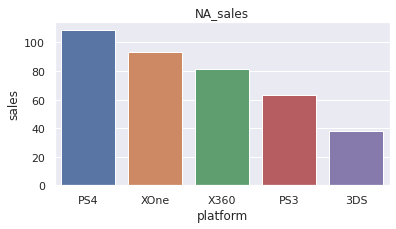

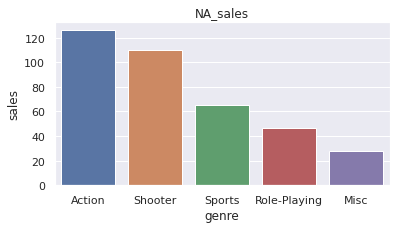

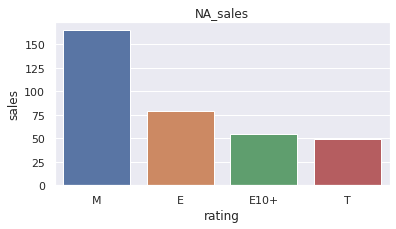

In [31]:
# Посмотрим на графики наилучших продаж по разным характеристикам и регионам

prop = ['platform','genre','rating']
# region = ['na_sales','eu_sales','jp_sales']
for i in prop:
        top_na = data.query('year_of_release>=2013').pivot_table(index=i, values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False).head(5).reset_index()
        bar = sb.barplot(y='na_sales',x=i,  data=top_na)
        sb.set(rc = {'figure.figsize':(6,3)})
        bar.set(xlabel=i, ylabel='sales',title='NA_sales')
        plt.show()

Самые популярные игровые платформы в северо-американском регионе в период с 2013 по 2016 гг: PS4, XOne
Самые популярные игровые жанры в северо-американском регионе в период с 2013 по 2016 гг: action, shooter, sports
Самые доходные рейтинги ESRB в северо-американском регионе в период с 2013 по 2016 гг: "для взрослых", на втором месте "для всех" и затем подросткам "для всех от 10 и старше".

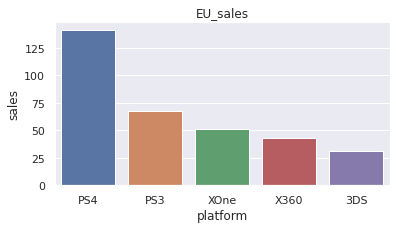

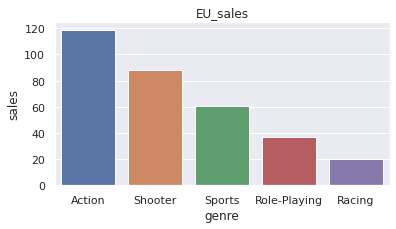

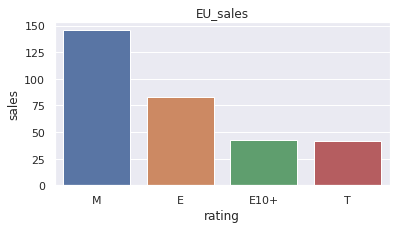

In [25]:
prop = ['platform','genre','rating']
# region = ['na_sales','eu_sales','jp_sales']
for i in prop:
        top_na = data.query('year_of_release>=2013').pivot_table(index=i, values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False).head(5).reset_index()
        bar = sb.barplot(y='eu_sales',x=i,  data=top_na)
        sb.set(rc = {'figure.figsize':(6,3)})
        bar.set(xlabel=i, ylabel='sales',title='EU_sales')
        plt.show()

Самые популярные игровые платформы в европейском регионе в период с 2013 по 2016 гг: PS4, XOne
Самые популярные игровые жанры в европейском регионе в период с 2013 по 2016 гг: action, shooter, sports
Самые доходные рейтинги ESRB в европейском регионе в период с 2013 по 2016 гг: "для взрослых", на втором месте "для всех" и затем подросткам "для всех от 10 и старше".

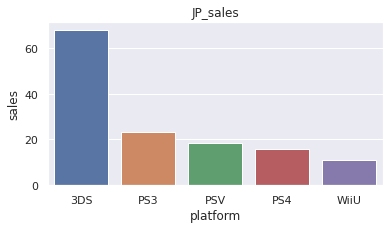

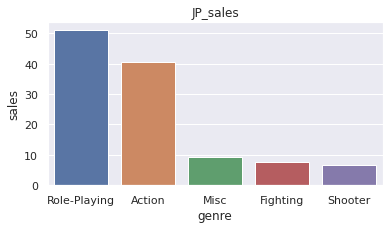

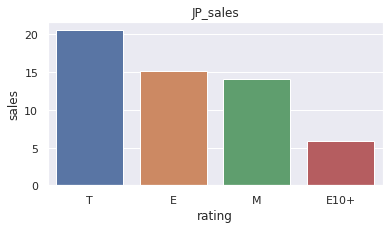

In [26]:
prop = ['platform','genre','rating']
# region = ['na_sales','eu_sales','jp_sales']
for i in prop:
        top_na = data.query('year_of_release>=2013').pivot_table(index=i, values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False).head(5).reset_index()
        bar = sb.barplot(y='jp_sales',x=i,  data=top_na)
        sb.set(rc = {'figure.figsize':(6,3)})
        bar.set(xlabel=i, ylabel='sales',title='JP_sales')
        plt.show()

Самые популярные игровые платформы в Японии в период с 2013 по 2016 гг:  3DS, PS
Самые популярные игровые жанры в Японии в период с 2013 по 2016 гг: role-playng, action, misc
Самые доходные рейтинги ESRB в Японии в период с 2013 по 2016 гг: подросткам "от 13 и выше", на втором месте "для всех" и затем "для взрослых".

Исходя из этих данных, можно сказать, что игровые предпочтения жителей североамериканского и европейского региона почти сопадают, в то время как предпочтения японских геймеров отличаются, возможно, в силу культурных особенностей. Соответственно, бюджет следует планировать с учетом различий японского рынка от западных рынков.
В среднем наиболее прибыльными показывают себя игры в жанре action и shooter для консольных платформ Xbox и PS с рейтингом ESRB T ("Для взрослых").

<a id="research"></a>
## 5. Проверка гипотез

<a id="ans1"></a>
### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [27]:
# Посмотрим на средние рейтинги в соответствии с нашим периодом и указанными платформами.

xone_rat = data.query('platform =="XOne" and year_of_release>=2013 and user_score.isna()==False')['user_score']
print('Средний рейтинг Xbox One:', xone_rat.mean())

pc_rat = data.query('platform =="PC" and year_of_release>=2013 and user_score.isna()==False')['user_score']
print('Средний рейтинг PC:', pc_rat.mean())

Средний рейтинг Xbox One: 6.521428
Средний рейтинг PC: 6.28038


In [28]:
#Проверим гипотезу с помощью ttest_ind

# print(xone_rat.var())
# print(pc_rat.var())

alpha = 0.01
results = st.ttest_ind(xone_rat, pc_rat, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16174444115103942
Не получилось отвергнуть нулевую гипотезу


Значение p-value заметно меньше 1%. Соответственно, отвергаем нулевую гипотезу: вероятно, средние пользовательские рейтинги платформ Xbox One и PC различаются.

<a id="ans2"></a>
### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [29]:
# Посмотрим на средние рейтинги в соответствии с нашим периодом и указанными жанрами.

action_rat = data.query('genre =="Action" and year_of_release>=2013 and user_score.isna()==False')['user_score']
print('Средний рейтинг жанра Action:', action_rat.mean())

sports_rat = data.query('genre =="Sports" and year_of_release>=2013 and user_score.isna()==False')['user_score']
print('Средний рейтинг жанра Sports:', sports_rat.mean())

Средний рейтинг жанра Action: 6.8375
Средний рейтинг жанра Sports: 5.238125


In [30]:
#Проверим гипотезу с помощью ttest_ind

# print(action_rat.var())
# print(sports_rat.var())

alpha = 0.01
results = st.ttest_ind(action_rat, sports_rat, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3883285709002667e-20
Отвергаем нулевую гипотезу


Значение p-value намного меньше 1%. Соответственно, отвергаем нулевую гипотезу: вероятно, средние пользовательские рейтинги жанров Action и Sports различаются. Гипотеза о различии оправдала себя.

<a id="summary"></a>
## 6. Общий вывод

Были открыты и изучены данные о продажах игр кампании "Стримчик" до 2016 года.

* Проведена предобработка данных, часть пропусков было заполнена исходя из логики данных.<br>
* Типы полей были изменены в соответствии с данными в них и исходя из целей экономии памяти.<br>
* Названия полей были приведены к нижнему регистру.<br>
* В датафрэйм было добавлено поле с расчетом общих продаж.

Был проведен исследовательский анализ данных:

* Было выявлено, что количество игр резко возросло после с 1991го года. Пик приходится на 2007 год. С 2008 года производство игр пошло на спад из-за роста популярности мобильных игр.
* Найдены самые популярные игровые платформы за все годы: PS2, X360, PS3, WII, DS, PS.
* Отмечено, что продажи платформ существуют в среднем 8 лет. За рассматриваемый период 2013-2016, наилучшие продажи были у PS4 и XOne.
* Построен график "ящик с усами" по которому видно, что медианы продаж выше всего у игр на PS4 и XOne.
* Построены диаграммы рассеяния и посчитана корреляция между отзывами и продажами: корреляция между продажами и оценками критиков заметно выше, чем аналогичная корреляция с оценками пользователей.
* Выявлено, что наиболее продаваемый жанр - Action, самый невыгодный, Strategy.

Составлены портреты пользователей различных регионов:

* Можно сказать, что игровые предпочтения жителей североамериканского и европейского региона почти сопадают, в то время как предпочтения японских геймеров отличаются, возможно, в силу культурных особенностей.
* В среднем наиболее прибыльными для всех регионов показывают себя игры в жанре action для консольных платформ XOne и PS4 с рейтингом ESRB T ("Для взрослых").

Проверены следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Гипотеза отвергнута.
* Средние пользовательские рейтинги жанров Action и Sports разные
Гипотеза не отвергнута.

Вывод: Оптимальным планом продаж на 2017 год был бы выбор игр в жанрах action, sports, shooter на платформах XOne и PS4 новых поколений с рейтингом ESRB T ("Для взрослых") для западных стран и role-playng, action на платформах PS4, Nintendo для Японии с аналогичным рейтингом.